In [1]:
#imports 
import os 
import pickle
import re
import math 
import json 
import random 
from dotenv import load_dotenv 
from huggingface_hub import login 
from items import Item 
from tester_function import Tester
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from openai import OpenAI



In [3]:
!pip install anthropic
from anthropic import Anthropic



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [8]:
with open('train.pkl', 'rb') as file:
    train = pickle.load(file)


with open('test.pkl', 'rb') as file:
    test = pickle.load(file)

In [5]:
!git config --global credential.helper store

load_dotenv("hg_token.env")
huggingface_token = os.getenv("HUGGINGFACE_TOKEN")
login(token=huggingface_token, add_to_git_credential=True)

In [6]:
load_dotenv("gpt_token.env")
openai_api_key = os.getenv("OPENAI_API_KEY")
openai = OpenAI()


In [9]:
#we gor for 500 example
fine_tune_train = train[:500]
fine_tune_validation = train[500:550]

## Step1

In [ ]:
#first lets go for a good prompt for a Frontier model
# notice that we are removing "to the nearest dollar"
# when we train our own models, we will need to make the problem as easy as possible
# but a frontier model needs no such simplification

In [13]:
#use this function to turn the item into a list of messages formatted for a chat model like gpt
# format: sytem_user_assistant messages
def messages_for(item):
    system_message = "you estimate the prices of items. reply only with the price, no explanation"
    user_prompt = item.test_prompt().replace("to the nearest dollar", "").replace("\n\nprice is $", "")
    return [

        {"role": "system","content":system_message},
        {"role": "user","content":user_prompt},
        {"role": "assistant","content":f"price is ${item.price:.2f}"}
    ]


In [14]:
messages_for(train[0])

[{'role': 'system',
  'content': 'you estimate the prices of items. reply only with the price, no explanation'},
 {'role': 'user',
  'content': 'How much does this cost ?\n\nSuper-Softie Kit 416, Super-Softie and Lyre Mount Kit for Sennheiser MKH 416 Sennheiser ME66 K6, Rode NTG3 and Sanken CS-3e\nAerodynamic and durable, the Super-Softie Kit 416 slip-on microphone windshield and shock mounting system provides superior performance and unparalleled durability for your Sennheiser MKH 416, also Sennheiser ME66 K6, Rode NTG3 and Sanken CS-3e. Kit includes Super-Softie Windshield and Universal Shotgun Mount ideal for boom pole use or on-camera with included brass cold-shoe adaptor. Perfect for the Sennheiser MKH 416, also Sennheiser ME66 K6,\n\nPrice is $'},
 {'role': 'assistant', 'content': 'price is $205.00'}]

In [41]:
def make_json(items):
    result = ""
    for item in items:
        messages = messages_for(item)
        messages_str = json.dumps(messages)
        result += '{"messages": '+messages_str +'}\n'
    return result.strip()
        
        

In [20]:
print(make_json(train[:3]))

{"messages": [{"role": "system", "content": "you estimate the prices of items. reply only with the price, no explanation"}, {"role": "user", "content": "How much does this cost ?\n\nSuper-Softie Kit 416, Super-Softie and Lyre Mount Kit for Sennheiser MKH 416 Sennheiser ME66 K6, Rode NTG3 and Sanken CS-3e\nAerodynamic and durable, the Super-Softie Kit 416 slip-on microphone windshield and shock mounting system provides superior performance and unparalleled durability for your Sennheiser MKH 416, also Sennheiser ME66 K6, Rode NTG3 and Sanken CS-3e. Kit includes Super-Softie Windshield and Universal Shotgun Mount ideal for boom pole use or on-camera with included brass cold-shoe adaptor. Perfect for the Sennheiser MKH 416, also Sennheiser ME66 K6,\n\nPrice is $"}, {"role": "assistant", "content": "price is $205.00"}]}
{"messages": [{"role": "system", "content": "you estimate the prices of items. reply only with the price, no explanation"}, {"role": "user", "content": "How much does this c

In [42]:
#convert the items into jsonl and write them to a file
def write_jsonl(items, filename):
    with open(filename, "w") as f:
        jsonl = make_json(items)
        f.write(jsonl)
    

In [43]:
write_jsonl(fine_tune_train, "fine_tune_train.jsonl")


In [44]:
write_jsonl(fine_tune_validation, "fine_tune_validation.jsonl")


In [53]:
with open("fine_tune_train.jsonl", "rb") as f:
    train_file = openai.files.create(file=f, purpose="fine-tune")
    

In [49]:
train_file

FileObject(id='file-FrKGeJCHv5iw8ZcPzmG2sv', bytes=476263, created_at=1745417065, filename='fine_tune_train.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, expires_at=None)

In [55]:
with open("fine_tune_validation.jsonl", "rb") as f:
    validation_file = openai.files.create(file=f, purpose="fine-tune")

In [56]:
validation_file

FileObject(id='file-SssdxKncohduF2qiaTxKS1', bytes=47454, created_at=1745417238, filename='fine_tune_validation.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, expires_at=None)

## Step2

In [ ]:
## weights and biases is integrated with openai for fine tuning

In [ ]:
#first we create our weights and biases

## and now time for fine tune

In [57]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 149.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [59]:
# import wandb

In [61]:
# load_dotenv("wb.env")

# #get the key from environment variable
# wandb_api_key = os.getenv("wandb_api_key")

# #login to wandb
# wandb.login(key=wandb_api_key)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: zohreh-nikkhah1984 (zohreh-nikkhah1984-stealth-ai-startup) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [62]:
# wandb_integration = {"type":"wandb", "wandb":{"project":"gpt-pricer"}}

In [68]:
train_file

FileObject(id='file-CANjKxGEbNdiSTDg54vB46', bytes=476263, created_at=1745417213, filename='fine_tune_train.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, expires_at=None)

In [69]:
train_file.id

'file-CANjKxGEbNdiSTDg54vB46'

In [64]:
validation_file.id

'file-SssdxKncohduF2qiaTxKS1'

In [72]:
openai.fine_tuning.jobs.create(
    training_file = train_file.id,
    validation_file = validation_file.id,
    model = "gpt-4o-mini-2024-07-18",
    seed = 42,
    hyperparameters={"n_epochs":1},
    # integrations=[wandb_integration],
    suffix="pricer"
    
    
)

FineTuningJob(id='ftjob-pK54tAhvwdCcE7lYbgKRDTNG', created_at=1745427465, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs=1), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-LrQT4u0SX1dJEcN6VYNrqvLp', result_files=[], seed=42, status='validating_files', trained_tokens=None, training_file='file-CANjKxGEbNdiSTDg54vB46', validation_file='file-SssdxKncohduF2qiaTxKS1', estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs=1)), type='supervised'), user_provided_suffix='pricer', metadata=None)

In [83]:
openai.fine_tuning.jobs.list(limit=1)

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-pK54tAhvwdCcE7lYbgKRDTNG', created_at=1745427465, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal:pricer:BPXus2Gn', finished_at=1745428273, hyperparameters=Hyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=1), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-LrQT4u0SX1dJEcN6VYNrqvLp', result_files=['file-KaAVU9kioLzi74xUwg77yC'], seed=42, status='succeeded', trained_tokens=100589, training_file='file-CANjKxGEbNdiSTDg54vB46', validation_file='file-SssdxKncohduF2qiaTxKS1', estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=1)), type='supervised'), user_provided_suffix='pricer', metadata=None)], object='list', has_more=True)

In [88]:
job_id = openai.fine_tuning.jobs.list(limit=1).data[0].id
job_id

'ftjob-pK54tAhvwdCcE7lYbgKRDTNG'

In [90]:
openai.fine_tuning.jobs.retrieve(job_id)

FineTuningJob(id='ftjob-pK54tAhvwdCcE7lYbgKRDTNG', created_at=1745427465, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal:pricer:BPXus2Gn', finished_at=1745428273, hyperparameters=Hyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=1), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-LrQT4u0SX1dJEcN6VYNrqvLp', result_files=['file-KaAVU9kioLzi74xUwg77yC'], seed=42, status='succeeded', trained_tokens=100589, training_file='file-CANjKxGEbNdiSTDg54vB46', validation_file='file-SssdxKncohduF2qiaTxKS1', estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=1)), type='supervised'), user_provided_suffix='pricer', metadata=None)

In [89]:
openai.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id, limit=10).data

[FineTuningJobEvent(id='ftevent-whiozPvIvpOmnxy88Gn5KS1r', created_at=1745428280, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'),
 FineTuningJobEvent(id='ftevent-kTAvUxxxf2zEBykCpHByUqge', created_at=1745428275, level='info', message='New fine-tuned model created', object='fine_tuning.job.event', data={}, type='message'),
 FineTuningJobEvent(id='ftevent-Z18ZBLO57uZ1jk34U6Blx6XI', created_at=1745428255, level='info', message='Step 500/500: training loss=1.41, validation loss=1.24, full validation loss=1.08', object='fine_tuning.job.event', data={'step': 500, 'train_loss': 1.413585901260376, 'valid_loss': 1.2384517192840576, 'total_steps': 500, 'full_valid_loss': 1.0818539571762085, 'train_mean_token_accuracy': 0.75, 'valid_mean_token_accuracy': 0.75, 'full_valid_mean_token_accuracy': 0.79}, type='metrics'),
 FineTuningJobEvent(id='ftevent-PdZnWSecDTPmMeoLf8fX8h2J', created_at=1745428244, level='info', message='Step 49

## Step3

In [92]:
fine_tuned_model_name = openai.fine_tuning.jobs.retrieve(job_id).fine_tuned_model

In [93]:
fine_tuned_model_name

'ft:gpt-4o-mini-2024-07-18:personal:pricer:BPXus2Gn'

In [96]:
#prompt
def messages_for(item):
    system_message = "you estimate the prices of items.Reply only with the price, no explanation"
    user_prompt= item.test_prompt().replace("to the nearest dollar", "").replace("\n\nprice is $", " ")
    return[
        {"role":"system", "content":system_message},
        {"role":"user", "content":user_prompt},
        {"role":"assistant", "content":"price is $"}
    ]
    
    

In [97]:
#try it out

messages_for(test[0])

[{'role': 'system',
  'content': 'you estimate the prices of items.Reply only with the price, no explanation'},
 {'role': 'user',
  'content': 'How much does this cost ?\n\nAC Compressor & A/C Clutch For Chevy Sonic 1.8L Non-Turbo 2013 2014 2015 2016 2017 2018 - BuyAutoParts New\nEngineered for superior durability, backed by a one year, unlimited mileage warranty Guaranteed Exact Fit for easy installation 100% BRAND NEW, premium ISO/TS 16949 quality - no core deposit or return required! Make sure you flush the system thoroughly and replace the drier filter along with the compressor for better long-term reliability, or consider one of our AC kits that includes everything you need! Fits Chevy Sonic with the 1.8L non-turbo Manufacturer BuyAutoParts, Brand BUYAUTOPARTS!, Weight 12 pounds, Dimensions 11 x 9\n\nPrice is $'},
 {'role': 'assistant', 'content': 'price is $'}]

In [98]:
# a utility function to extract price from the string
def get_price(s):
    s = s.replace('$','').replace(',','')
    match = re.search(r"[-+]?\d*\.\d+|\d+", s)
    return float(match.group()) if match else 0


In [99]:
get_price("The price is roughly $99.99 because blah blah")


99.99

In [106]:
#the function for gpt4o-mini
def gpt_fine_tuned(item):
    # print(item.price)
    response = openai.chat.completions.create(
        model="gpt-4o-mini-2024-07-18",
        messages=messages_for(item),
        max_tokens=5,
        seed=42
    )
    reply = response.choices[0].message.content
    # print(f"reply:{reply}")
    return get_price(reply)
    

In [102]:
test[0].price

250.41

In [107]:
gpt_fine_tuned(test[0])

150.0

1: Guess: $150.00 Truth: $250.41 Error: $100.41 SLE: 0.26 Item: AC Compressor & A/C Clutch For Chevy Son...
2: Guess: $85.00 Truth: $118.50 Error: $33.50 SLE: 0.11 Item: MCR Safety BPCL3LX3 Luminator Class 3 In...
3: Guess: $150.00 Truth: $263.21 Error: $113.21 SLE: 0.31 Item: CABOT SAMUEL 19205-08 INC 5GAL Pac RED D...
4: Guess: $79.99 Truth: $93.88 Error: $13.89 SLE: 0.03 Item: Carrying Case With Kickstand - CTA Secur...
5: Guess: $100.00 Truth: $222.35 Error: $122.35 SLE: 0.63 Item: Fill-Rite 807CN1 1" 5-20 GPM 3 Wheel Mec...
6: Guess: $139.99 Truth: $97.54 Error: $42.45 SLE: 0.13 Item: Evniset Kitchen Faucets Lead-Free Commer...
7: Guess: $600.00 Truth: $375.75 Error: $224.25 SLE: 0.22 Item: Kingston FURY Renegade RGB 128GB (4x32GB...
8: Guess: $180.00 Truth: $108.57 Error: $71.43 SLE: 0.25 Item: Elk 10150/1DR-WS Celina 1-Light Dark Rus...
9: Guess: $30.99 Truth: $84.99 Error: $54.00 SLE: 0.98 Item: DEWALT DWA4203B Bi Metal Wood with Nails...
10: Guess: $39.99 Truth: $34.99 Error: 

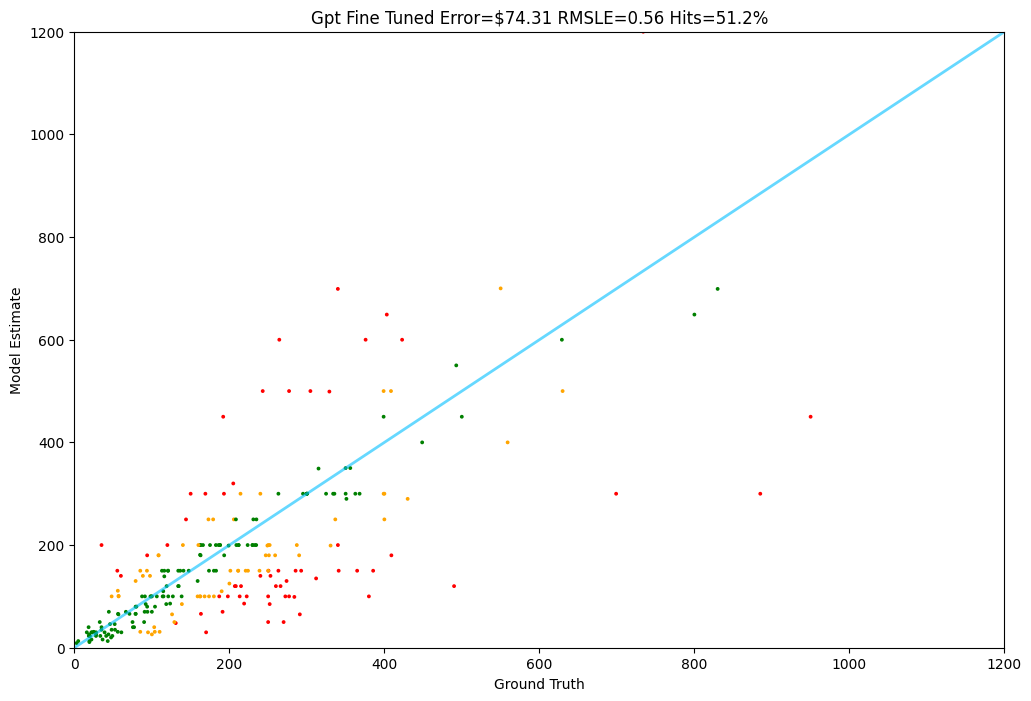

In [108]:
Tester.test(gpt_fine_tuned, test)